In [2]:
import os
import numpy as np
from tqdm import tqdm_notebook as tqdm
from scout.cyto import load_mesh, cross_products, dot_products
from scout.niche import randomly_sample
from scout.utils import filter_points_in_box

In [201]:
# working_dir = '/media/jswaney/Drive/Justin/organoid_phenotyping/zika_vs_ctrl/zikv/20190625_16_31_09_AA_ef24-zika5_488LP14_561LP140_642LP50/'
working_dir = '/media/jswaney/Drive/Justin/organoid_phenotyping/zika_vs_ctrl/zikv/20190625_16_04_10_AA_ef24-zika3_488LP18_561LP140_642LP50/'
os.listdir(working_dir)

['celltype_names.csv',
 'centroids.npy',
 'centroids_um.npy',
 'cyto_labels.npy',
 'cyto_names.csv',
 'cyto_profiles.npy',
 'cyto_profiles_sample.npy',
 'cyto_sample_index.npy',
 'Ex0_rescaled',
 'Ex1_rescaled',
 'Ex2_rescaled',
 'mesh_ventricles.pkl',
 'niche_labels.npy',
 'niche_names.csv',
 'niche_proximities.npy',
 'nuclei_binary.zarr',
 'nuclei_fluorescence',
 'nuclei_foreground.zarr',
 'nuclei_gating.npy',
 'nuclei_morphologies.csv',
 'nuclei_probability.zarr',
 'organoid_features.xlsx',
 'segment_foreground.tif',
 'segment_ventricles.tif',
 'sox2.zarr',
 'syto.zarr',
 'syto_down6x.tif',
 'tbr1.zarr',
 'voxel_size.csv']

In [202]:
mesh = load_mesh(os.path.join(working_dir, 'mesh_ventricles.pkl'))
mesh.keys()

dict_keys(['verts', 'faces', 'normals', 'values'])

In [203]:
cyto_labels = np.load(os.path.join(working_dir, 'cyto_labels.npy'))
cyto_labels.shape

(4934,)

In [204]:
verts = mesh['verts']
normals = mesh['normals']

normals.shape

(4934, 3)

In [205]:
verts, normals, cyto_labels = randomly_sample(100, verts, normals, cyto_labels)

normals.shape

(100, 3)

In [206]:
centroids_um = np.load(os.path.join(working_dir, 'centroids_um.npy'))
celltype_labels = np.load(os.path.join(working_dir, 'nuclei_gating.npy'))
proximities = np.load(os.path.join(working_dir, 'niche_proximities.npy'))

centroids_um.shape, celltype_labels.shape, proximities.shape

((475990, 3), (475990, 2), (475990, 2))

In [207]:
v = cross_products(normals)
c = dot_products(normals)

In [208]:
length = 300
radius = 25

zs = []
ps = []
ls = []

for vert, normal, vi, ci, lbl in tqdm(zip(verts, normals, v, c, cyto_labels), total=len(normals)):
    # Filter to only nearby points
    start = vert - length - radius
    stop = vert + length + radius
    pts, idx = filter_points_in_box(centroids_um, start, stop, return_idx=True)
    labels = celltype_labels[idx]
    prox = proximities[idx]
    
    # Translate points to origin
    pts_translated = pts - vert

    # Rotate points to align the normal with the z-axis
    v_cross = np.array([[0, -vi[2], vi[1]],
                        [vi[2], 0, -vi[0]],
                        [-vi[1], vi[0], 0]])
    rotation_matrix = np.eye(3) + v_cross + np.matmul(v_cross, v_cross) / (1 + ci)
    pts_translated_rotated = rotation_matrix.dot(pts_translated.T).T
    
    # Filter to cells only within a cylinder
    x, y, z = pts_translated_rotated[:, 2], pts_translated_rotated[:, 1], pts_translated_rotated[:, 0]
    idx = np.where(np.logical_and(x ** 2 + y ** 2 <= radius ** 2, 
                                  np.logical_and(z >= 0, z <= length)))[0]
    pts = pts[idx]
    labels = labels[idx]
    prox = prox[idx]
    z = z[idx]
    
    # store proximities with z distance and celltype labels
    zs.append(z)
    ps.append(prox)
    ls.append(lbl)

In [209]:
import matplotlib.pyplot as plt
from scout.utils import read_csv

In [210]:
cyto_names = read_csv(os.path.join(working_dir, 'cyto_names.csv'))
cyto_names

['Tbr1+',
 'Artifacts',
 'Artifacts2',
 'Interfering',
 'Trash',
 'Surface',
 'DNs',
 'ThinSOX2']

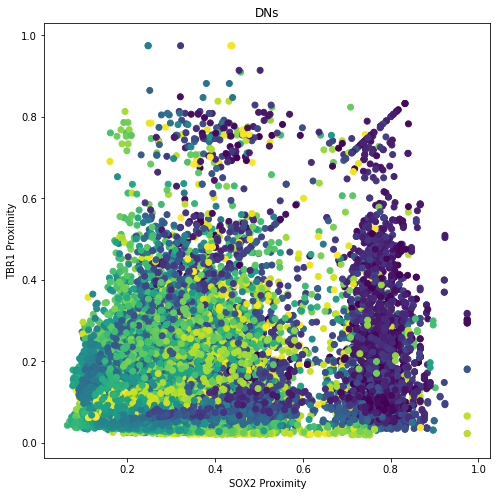

In [220]:
lbl = 6

plt.figure(figsize=(8, 8))
for z, p, l in zip(zs, ps, ls):
    if l == lbl:
        plt.scatter(p[:, 0], p[:, 1], c=z)
plt.title(cyto_names[lbl])
plt.xlabel('SOX2 Proximity')
plt.ylabel('TBR1 Proximity')
plt.show()

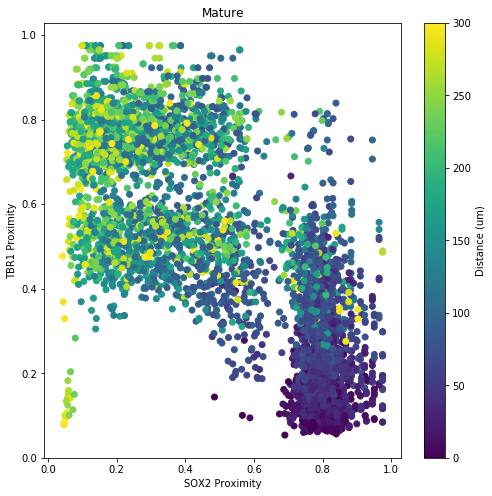

In [90]:
lbl = 1

plt.figure(figsize=(8, 8))
for z, p, l in zip(zs, ps, ls):
    if l == lbl:
        plt.scatter(p[:, 0], p[:, 1], c=z)
plt.title(cyto_names[lbl])
plt.clim([0, 300])
plt.colorbar(label='Distance (um)')
plt.xlabel('SOX2 Proximity')
plt.ylabel('TBR1 Proximity')
plt.show()

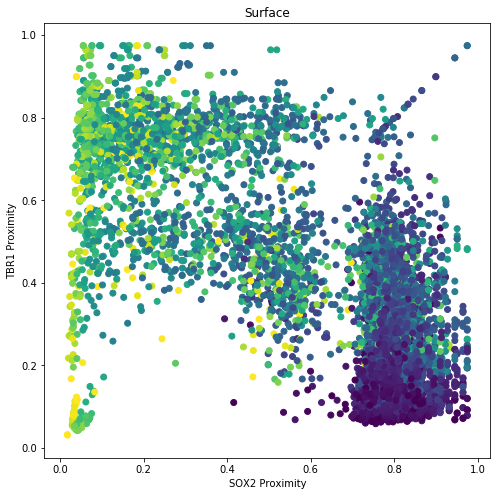

In [82]:
lbl = 2

plt.figure(figsize=(8, 8))
for z, p, l in zip(zs, ps, ls):
    if l == lbl:
        plt.scatter(p[:, 0], p[:, 1], c=z)
plt.title(cyto_names[lbl])
plt.xlabel('SOX2 Proximity')
plt.ylabel('TBR1 Proximity')
plt.show()

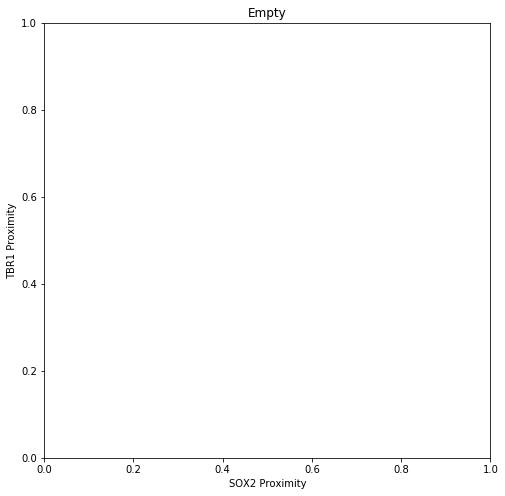

In [83]:
lbl = 3

plt.figure(figsize=(8, 8))
for z, p, l in zip(zs, ps, ls):
    if l == lbl:
        plt.scatter(p[:, 0], p[:, 1], c=z)
plt.title(cyto_names[lbl])
plt.xlabel('SOX2 Proximity')
plt.ylabel('TBR1 Proximity')
plt.show()

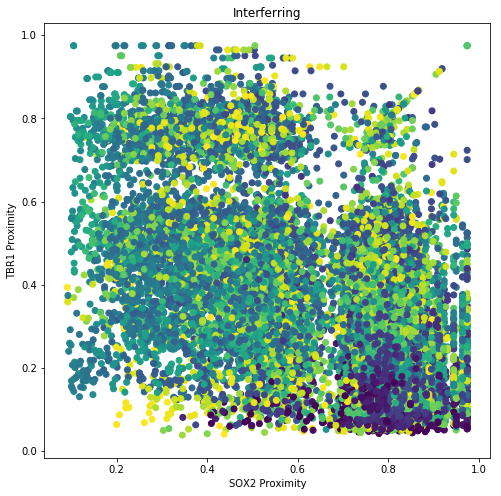

In [84]:
lbl = 4

plt.figure(figsize=(8, 8))
for z, p, l in zip(zs, ps, ls):
    if l == lbl:
        plt.scatter(p[:, 0], p[:, 1], c=z)
plt.title(cyto_names[lbl])
plt.xlabel('SOX2 Proximity')
plt.ylabel('TBR1 Proximity')
plt.show()

Bin the cells by distance

In [212]:
from scout.cyto import make_bins
import matplotlib.cm as cm

In [213]:
bins = 16

bin_edges, bin_height = make_bins(0, length, bins)

In [214]:
Z = np.concatenate(zs)
P = np.concatenate(ps)
L = np.concatenate([len(p) * [l] for p, l in zip(ps, ls)])
Z.shape, P.shape, L.shape

((35979,), (35979, 2), (35979,))

In [221]:
lbl = 6

idx = np.where(L == lbl)[0]

Zc = Z[idx]
Pc = P[idx]

In [222]:
Zc_bin_idx = np.digitize(Zc, bin_edges)

Pc_mean = []
Pc_stdev = []
for i, bin_edge in enumerate(bin_edges[:-1]):
    loc = np.where(Zc_bin_idx == i+1)
    Pc_bin = Pc[loc]
    Pc_mean.append(Pc_bin.mean(axis=0))
    Pc_stdev.append(Pc_bin.std(axis=0))
Pc_mean = np.asarray(Pc_mean)
Pc_stdev = np.asarray(Pc_stdev)

Pc_mean.shape, Pc_stdev.shape

((16, 2), (16, 2))

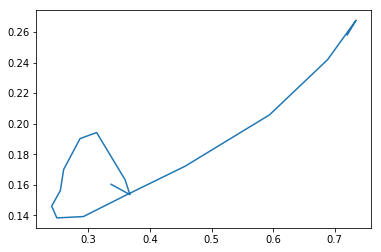

In [223]:
plt.plot(Pc_mean[:, 0], Pc_mean[:, 1])
plt.show()

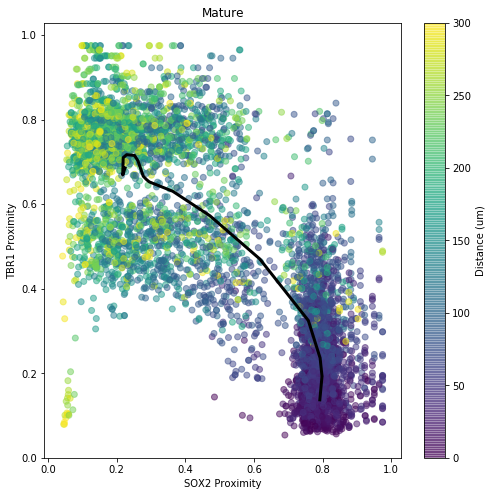

In [188]:
lbl = 1

plt.figure(figsize=(8, 8))
for z, p, l in zip(zs, ps, ls):
    if l == lbl:
        plt.scatter(p[:, 0], p[:, 1], c=z, alpha=0.5)
plt.plot(Pc_mean[:, 0], Pc_mean[:, 1], 'k-', linewidth=3)
plt.title(cyto_names[lbl])
plt.clim([0, 300])
plt.colorbar(label='Distance (um)')
plt.xlabel('SOX2 Proximity')
plt.ylabel('TBR1 Proximity')
plt.show()

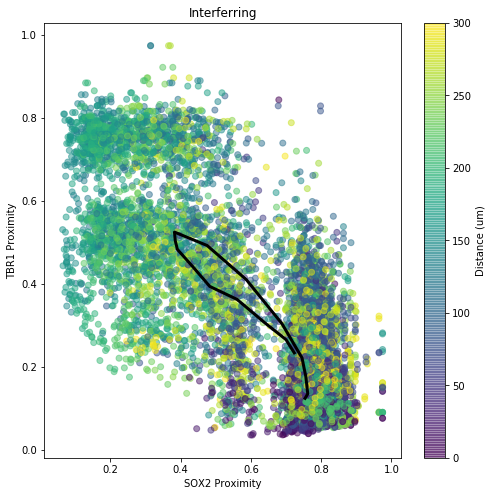

In [240]:
lbl = 4

plt.figure(figsize=(8, 8))
for z, p, l in zip(zs, ps, ls):
    if l == lbl:
        plt.scatter(p[:, 0], p[:, 1], c=z, alpha=0.5)
plt.plot(Pc_mean[:, 0], Pc_mean[:, 1], 'k-', linewidth=3)
plt.title(cyto_names[lbl])
plt.clim([0, 300])
plt.colorbar(label='Distance (um)')
plt.xlabel('SOX2 Proximity')
plt.ylabel('TBR1 Proximity')
plt.show()

# 3D trajectories

In [130]:
from mpl_toolkits import mplot3d

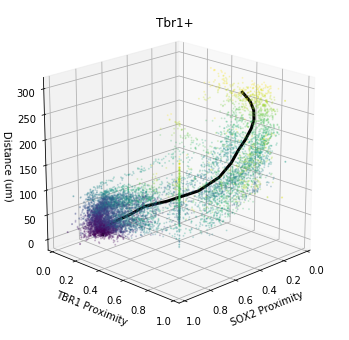

In [179]:
%matplotlib inline
lbl = 0

fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection='3d')

ax.plot(Pc_mean[:, 0], Pc_mean[:, 1], bin_edges[:-1], 'k-', linewidth=3)

for z, p, l in zip(zs, ps, ls):
    if l == lbl:
        ax.scatter(p[:, 0], p[:, 1], z, c=z, alpha=0.2, s=1)

ax.view_init(elev=20, azim=45)

plt.title(cyto_names[lbl])
# ax.clim([0, 300])
# plt.colorbar(label='Distance (um)')
ax.set_xlabel('SOX2 Proximity')
ax.set_ylabel('TBR1 Proximity')
ax.set_zlabel('Distance (um)')
plt.show()

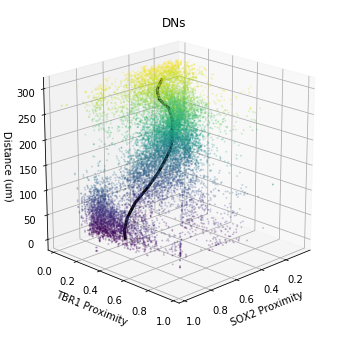

In [224]:
%matplotlib inline
lbl = 6

fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection='3d')

ax.plot(Pc_mean[:, 0], Pc_mean[:, 1], bin_edges[:-1], 'k-', linewidth=3)

for z, p, l in zip(zs, ps, ls):
    if l == lbl:
        ax.scatter(p[:, 0], p[:, 1], z, c=z, alpha=0.2, s=1)
        
ax.view_init(elev=20, azim=45)

plt.title(cyto_names[lbl])
# ax.clim([0, 300])
# plt.colorbar(label='Distance (um)')
ax.set_xlabel('SOX2 Proximity')
ax.set_ylabel('TBR1 Proximity')
ax.set_zlabel('Distance (um)')
plt.show()

Need to get more insight as to the appearance of various cytoarchitectures... 
- Interpolate 3D image along a given normal
    - Prefer XY cutting plane for resolution, so orient by being orthogonal to X or Y
- Extract 3D ROI of cell detections and ventricle